# Comparison with synthetic data

We shall compare our comparison methods (ahem) with a real geographic region (Chicago North Side, for variety) three models (detailed below, all are (in)homogeneous Poisson processes) and with 3 choices of "rate", governing the expected number of "actual" events to test against.  Our "predictions" will be the same as the models, to see how well a model fits data from a different model.

### Model 1

[Complete Spatial Random-ness](https://en.wikipedia.org/wiki/Complete_spatial_randomness).

### Model 2

A simple inhomogeneous poisson process with intensity varying linearly in the x direction across the geometry

### Model 3


## Procedure

Everything will happen on a grid of size of 150m

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.collections
import descartes
import numpy as np
import os

import open_cp.sources.chicago
import open_cp.geometry
import open_cp.plot

# The geometry and grid

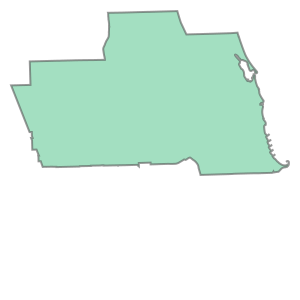

In [10]:
open_cp.sources.chicago.set_data_directory(os.path.join("..", "..", "..", "..", "Data"))
northside = open_cp.sources.chicago.get_side("North")
northside

In [40]:
grid = open_cp.data.Grid(150, 150, 0, 0)
grid = open_cp.geometry.mask_grid_by_intersection(northside, grid)
grid

MaskedGrid(offset=(349500,582300), size=150x150, mask region=65x39)

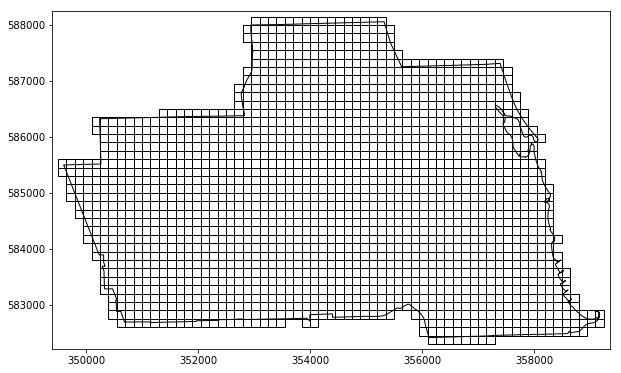

In [41]:
p = open_cp.plot.patches_from_grid(grid)

fig, ax = plt.subplots(figsize=(10,10))
ax.add_collection(matplotlib.collections.PatchCollection(p, facecolor="none", edgecolor="black"))
ax.add_patch(descartes.PolygonPatch(northside, fc="none"))

xmin, ymin, xmax, ymax = northside.bounds
d = 200
ax.set(xlim=[xmin-d,xmax+d], ylim=[ymin-d, ymax+d])
ax.set_aspect(1)
None

# The models

In [74]:
class BaseModel():
    def __init__(self, grid):
        self._grid = grid
    
    def prob(self, x, y):
        raise NotImplementedError()
        
    @property
    def grid(self):
        return self._grid
        
    def to_grid_coords(self, x, y):
        pt = np.asarray([x,y]) - [self.grid.xoffset, self.grid.yoffset]
        pt = np.floor_divide(pt, [self.grid.xsize, self.grid.ysize]).astype(np.int)
        return pt

    def in_grid(self, x, y):
        pt = self.to_grid_coords(x, y)
        if np.all((pt >= [0, 0]) & (pt < [self.grid.xextent, self.grid.yextent])):
            return self.grid.is_valid(*pt)
        return False
    
b = BaseModel(grid)
assert not b.in_grid(0,0)
assert b.in_grid(354000, 584000)
assert np.all(b.to_grid_coords(grid.xoffset, grid.yoffset) == [0,0])

In [ ]:
def sample(model, size):
    # TODO: Rejection sampling
    pass

In [75]:
class Model1(BaseModel):
    def __init__(self, grid):
        super().__init__(grid)
        self._inv_area = 1.0 / np.sum(~grid.mask)
        
    def prob(self, x, y):
        if self.in_grid(x, y):
            return self._inv_area
        return 0

def model2(x, y):
    def __init__(self, grid):
        super().__init__(grid)
        probs = np.linspace(0, 1, grid.xextent)
        probs = probs[None,:] + np.zeros(grid.yextent)[:,None]
        probs = grid.mask_matrix(probs)
        self._probs = probs / np.sum(probs)
        
    def prob(self, x, y):
        if self.in_grid(x, y):
            pt = self.to_grid_coords(x, y)
            return self._probs[pt[1], pt[0]]
        return 0

# TODO

- Model 3
- Form example predcitions, and plot them.
- Write evalution code
- See what we get!